In [143]:
import pandas as pd

In [144]:
data = pd.read_csv('labled_batch.csv')
print(data['Input.Post_text'].nunique())
print(len(data[data['comment_label']!=5]))
df = data[data['comment_label']!=5]
df = df[df['comment_label']!=0]

48
48


In [145]:
df.drop(columns = ['Unnamed: 0','help_beings','protect_environment','attention','thier_own_good','quality_of_life','Position','rater_id','biospheric_mean','egocentric_mean','label'],inplace = True)
df.head()

,HITId,Input.Post_text,Input.Subreddit,our_classification,Positions,comment_label,compound
0,31JUPBOOROZ4TV93SPBRNFS0ZY68L2,I like having a clean tidy house. I like havin...,minimalism,egocentric,1,1,0.9705
5,3O4VWC1GEX1CX8FXDN4IGJ7XFN9J3J,Neurological issues and facing death. The simp...,minimalism,egocentric,2,1,0.5574
10,3XAOZ9UYR0MX9S5VL9A8PR4MVYNQ1P,Financial: Keeping less belongings means new a...,minimalism,egocentric,3,1,0.2500
15,3MWOYZD5WWJX2NZ4BJG2XTMPJYANOM,Lost the person I cared about the most. Then e...,minimalism,egocentric,4,1,-0.4795
20,3Q7TKIAPOU5GAQ5U9XM79761AP3LDL,"Clutter, wanting Financial Independence. Among...",minimalism,egocentric,5,1,0.0000


In [4]:
len(df)

47

## Transferring from [1,2] to binary labeling

In [5]:
for i in range(len(df)):
    if df['comment_label'].iloc[i] == 2:
        df['comment_label'].iloc[i] = 1
    elif df['comment_label'].iloc[i] == 1:
        df['comment_label'].iloc[i] = 0

C:\Users\wasee\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
df['comment_label'][0:8]

0     0
5     0
10    0
15    0
20    0
25    0
30    0
35    1
Name: comment_label, dtype: int64

## Splitting to two data sets : Minimalism and Veganism

In [7]:
minimalism_df = df[df['Input.Subreddit']=='minimalism']
vegan_df = df[df['Input.Subreddit']=='vegan']
minimalism_df.describe()

,comment_label,compound
count,23.000000,23.000000
mean,0.391304,-0.064813
std,0.499011,0.606660
min,0.000000,-0.921700
25%,0.000000,-0.680000
50%,0.000000,-0.090000
75%,1.000000,0.489450
max,1.000000,0.970500


In [8]:
vegan_df.describe()

,comment_label,compound
count,24.000000,24.000000
mean,0.458333,0.059812
std,0.508977,0.611018
min,0.000000,-0.872000
25%,0.000000,-0.543150
50%,0.000000,0.182850
75%,1.000000,0.492450
max,1.000000,0.921600


In [9]:
print("vegan biospheric labled posts : " ,len(vegan_df[vegan_df['comment_label'] == 1]))
print("vegan egocentric labled posts : " , len(vegan_df[vegan_df['comment_label'] == 0]))
print("minimalism biospheric labled posts : " , len(minimalism_df[minimalism_df['comment_label'] == 1]))
print("minimalism biospheric labled posts : " , len(minimalism_df[minimalism_df['comment_label'] == 0]))


vegan biospheric labled posts :  11
vegan egocentric labled posts :  13
minimalism biospheric labled posts :  9
minimalism biospheric labled posts :  14


In [10]:
minimalism_df.head()

,HITId,Input.Post_text,Input.Subreddit,our_classification,comment_label,compound
0,31JUPBOOROZ4TV93SPBRNFS0ZY68L2,I like having a clean tidy house. I like havin...,minimalism,egocentric,0,0.9705
5,3O4VWC1GEX1CX8FXDN4IGJ7XFN9J3J,Neurological issues and facing death. The simp...,minimalism,egocentric,0,0.5574
10,3XAOZ9UYR0MX9S5VL9A8PR4MVYNQ1P,Financial: Keeping less belongings means new a...,minimalism,egocentric,0,0.2500
15,3MWOYZD5WWJX2NZ4BJG2XTMPJYANOM,Lost the person I cared about the most. Then e...,minimalism,egocentric,0,-0.4795
20,3Q7TKIAPOU5GAQ5U9XM79761AP3LDL,"Clutter, wanting Financial Independence. Among...",minimalism,egocentric,0,0.0000


## 1. Creating Features

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 

stop_words = stopwords.words('english')
stemmer = PorterStemmer()

In [12]:
#tokenize, stem, and remove stopwords
def tokenize_clean_and_stem(text):
    tokens = word_tokenize(text.lower())
    stems = []
    for token in tokens:
        if token not in stop_words and token.isalnum():
            stems.append(PorterStemmer().stem(token))
    return stems

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TFIDF vector, remove common english words.
tfidf_vegan = TfidfVectorizer(tokenizer=tokenize_clean_and_stem, ngram_range=(1,2), min_df=0.1)# min_df is how
tfidf_minimalism = TfidfVectorizer(tokenizer=tokenize_clean_and_stem, ngram_range=(1,2), min_df=0.1)# min_df is
# min_df - igonre words that appear in less than 15% of the reviews (i.e., less than 60 reviews).

tfidf_matrix_vegan = tfidf_vegan.fit_transform(vegan_df["Input.Post_text"].tolist())
tfidf_matrix_minimalism = tfidf_minimalism.fit_transform(minimalism_df["Input.Post_text"].tolist())

dense_vegan = tfidf_matrix_vegan.todense()
dense_minimalism = tfidf_matrix_minimalism.todense()

print("vegan 90% common words",dense_vegan.shape)
print("minimalism 90% common words",dense_minimalism.shape)

vegan 90% common words (24, 21)
minimalism 90% common words (23, 39)


In [14]:
tfidf_features_vegan = tfidf_vegan.get_feature_names()
tfidf_features_minimalism = tfidf_minimalism.get_feature_names()
print(tfidf_features_vegan)
print("")
print(tfidf_features_minimalism)

vegan_features = pd.DataFrame(data=dense_vegan, columns=tfidf_features_vegan)
minimalism_features = pd.DataFrame(data=dense_minimalism, columns=tfidf_features_minimalism)


['alway', 'anim', 'diet', 'eat', 'enough', 'feel', 'first', 'get', 'go', 'health', 'im', 'like', 'look', 'made', 'motiv', 'much', 'reason', 'vegan', 'vegetarian', 'want', 'way']

['abl', 'actual', 'also', 'alway', 'better', 'buy', 'could', 'earth', 'environ', 'environment', 'everyth', 'financi', 'find', 'get', 'get rid', 'go', 'help', 'keep', 'life', 'like', 'live', 'lot', 'money', 'much', 'new', 'one', 'person', 'realiz', 'rid', 'save', 'seem', 'someth', 'spend', 'thing', 'time', 'want', 'wast', 'way', 'world']


In [15]:
minimalism_features.head()

,abl,actual,also,alway,better,buy,could,earth,environ,environment,...,save,seem,someth,spend,thing,time,want,wast,way,world
0,0.000000,0.0,0.275606,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.275606,0.253577,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.464275,0.0,0.000000,0.0,0.464275,0.000000,0.464275,0.0,0.464275,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.239808,0.000000,0.0,0.000000,0.0,...,0.521282,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.555241,0.0,0.519373,0.0,0.0,0.0


### adding compound to features for each behaviour

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

vegan_features['compound'] = list(vegan_df['compound'])
minimalism_features['compound'] = list(minimalism_df['compound'])
vegan_features.head()

,alway,anim,diet,eat,enough,feel,first,get,go,health,...,look,made,motiv,much,reason,vegan,vegetarian,want,way,compound
0,0.65359,0.381627,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.653590,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.4404
1,0.00000,0.000000,0.000000,0.0,0.30026,0.0,0.000000,0.553212,0.276606,0.000000,...,0.600519,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,-0.8708
2,0.00000,0.000000,0.455353,0.0,0.00000,0.0,0.494293,0.000000,0.000000,0.494293,...,0.000000,0.00000,0.00000,0.0,0.0,0.551365,0.0,0.0,0.0,0.7407
3,0.00000,1.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,-0.5423
4,0.00000,0.000000,0.000000,0.0,0.00000,0.0,0.577350,0.000000,0.000000,0.000000,...,0.000000,0.57735,0.57735,0.0,0.0,0.000000,0.0,0.0,0.0,-0.5994


### Train and Test Sets

In [17]:
from sklearn.model_selection import train_test_split
X_vegan = vegan_features
Y_vegan = vegan_df['comment_label']

X_vegan_train, X_vegan_test, Y_vegan_train, Y_vegan_test = train_test_split(X_vegan, Y_vegan, test_size=0.30, random_state=1) 
# random_state controls the shuffling applied to the data before applying the split. Pass an int for reproducible output 

print('X train set size: ' + str(X_vegan_train.shape))
print('X_test set size: ' + str(X_vegan_test.shape))
print('Y_train set size: ' + str(Y_vegan_train.shape))
print('Y_test set size: ' + str(Y_vegan_test.shape))

X train set size: (16, 22)
X_test set size: (8, 22)
Y_train set size: (16,)
Y_test set size: (8,)


In [18]:
print("number of vegan posts :" , len(Y_vegan))
print("number of vegan posts labled as biospheric :" , sum(Y_vegan))
print("number of vegan posts in the train set :" , len(Y_vegan_train))
print("number of vegan posts in the train set labled as biospheric :" , sum(Y_vegan_train))
print("number of vegan posts in the test set :" , len(Y_vegan_test))
print("number of vegan posts in the test set labled as biospheric :" , sum(Y_vegan_test))


number of vegan posts : 24
number of vegan posts labled as biospheric : 11
number of vegan posts in the train set : 16
number of vegan posts in the train set labled as biospheric : 7
number of vegan posts in the test set : 8
number of vegan posts in the test set labled as biospheric : 4


### manually splitting minimalism train to a more balanced sets : 

In [19]:
X_minimalism = minimalism_features
Y_minimalism = minimalism_df['comment_label']
labels = list(minimalism_df['comment_label'])
bio_train_indexes = [15,16,17,18,19,21]
bio_test_indexes = [7,10,22]

ego_train_indexes = [0,1,2,3,4,5,6,8,9]
ego_test_indexes = [11,12,13,14,20]

train_indexes = ego_train_indexes+bio_train_indexes
test_indexes = bio_test_indexes+ego_test_indexes

X_minimalism_train = []
Y_minimalism_train = []
for i in range(len(train_indexes)):
    X_minimalism_train.append(X_minimalism.iloc[train_indexes[i]])
    Y_minimalism_train.append(labels[train_indexes[i]])

    X_minimalism_test = []
Y_minimalism_test = []
for i in range(len(test_indexes)):
    X_minimalism_test.append(X_minimalism.iloc[test_indexes[i]])
    Y_minimalism_test.append(labels[test_indexes[i]])

print("number of minimalism posts :" , len(Y_minimalism))
print("number of minimalism posts labled as biospheric :" , sum(Y_minimalism))
print("number of minimalism posts in the train set :" , len(Y_minimalism_train))
print("number of minimalism posts in the train set labled as biospheric :" , sum(Y_minimalism_train))
print("number of minimalism posts in the test set :" , len(Y_minimalism_test))
print("number of minimalism posts in the test set labled as biospheric :" , sum(Y_minimalism_test))


number of minimalism posts : 23
number of minimalism posts labled as biospheric : 9
number of minimalism posts in the train set : 15
number of minimalism posts in the train set labled as biospheric : 6
number of minimalism posts in the test set : 8
number of minimalism posts in the test set labled as biospheric : 3


In [20]:
X_minimalism_train = pd.DataFrame(X_minimalism_train)
X_minimalism_test = pd.DataFrame(X_minimalism_test)


# 2. Feature Selection

### Filter Method

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

In [22]:
# Create the object for SelectKBest and fit and transform the data
# k is the number of features you want to select (here it's 7)
minimalism_selector = SelectKBest(score_func=f_classif, k=4)
vegan_selector = SelectKBest(score_func=f_classif, k=4)

X_minimalism_new=minimalism_selector.fit_transform(X_minimalism_train, Y_minimalism_train)
print(X_minimalism_new.shape)

X_vegan_new=vegan_selector.fit_transform(X_vegan_train, Y_vegan_train)
print(X_vegan_new.shape)

(15, 4)
(16, 4)


In [23]:
# Get columns to keep
minimalism_cols = minimalism_selector.get_support(indices=True) 
vegan_cols = vegan_selector.get_support(indices=True)
# Create new dataframe with only the desired columns
minimalism_features_new = X_minimalism_train.iloc[:, minimalism_cols]
vegan_features_new = X_vegan_train.iloc[:, vegan_cols]
minimalism_features_new

,alway,earth,wast,compound
0,0.000000,0.00000,0.000000,0.9705
1,0.000000,0.00000,0.000000,0.5574
2,0.000000,0.00000,0.000000,0.2500
3,0.000000,0.00000,0.000000,-0.4795
4,0.000000,0.00000,0.000000,0.0000
5,0.000000,0.00000,0.000000,-0.7003
6,0.000000,0.00000,0.000000,0.7263
8,0.000000,0.00000,0.000000,-0.6597
9,0.000000,0.00000,0.000000,-0.0900
15,0.330070,0.33007,0.330070,-0.1655


In [24]:
vegan_features_new

,alway,anim,get,health
2,0.000000,0.000000,0.000000,0.494293
19,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.380947,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000
21,0.000000,0.000000,0.000000,0.506765
1,0.000000,0.000000,0.553212,0.000000
16,0.000000,0.000000,0.000000,0.000000
0,0.653590,0.381627,0.000000,0.000000
15,0.000000,0.286001,0.000000,0.000000
23,0.000000,0.509293,0.000000,0.000000


### Wrapper Method

In [25]:
# This will take a while as we have many features.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initializing logistic regression model
model = LogisticRegression()

# Initializing RFE model with 7 features to select
minimalism_rfe_selector = RFE(model, n_features_to_select=4)
vegan_rfe_selector = RFE(model, n_features_to_select=4)
# Transforming data using RFE
X_rfe_minimalism = minimalism_rfe_selector.fit_transform(X_minimalism_train,Y_minimalism_train)
X_rfe_vegan = vegan_rfe_selector.fit_transform(X_vegan_train,Y_vegan_train)


In [26]:
# Get columns to keep
cols_rfe_minimalism = minimalism_rfe_selector.get_support(indices=True)
cols_rfe_vegan = vegan_rfe_selector.get_support(indices=True)

# Create new dataframe with only the desired columns
minimalism_features_rfe = X_minimalism_train.iloc[:, cols_rfe_minimalism]
vegan_features_rfe = X_vegan_train.iloc[:, cols_rfe_vegan]
minimalism_features_rfe


,earth,environment,wast,compound
0,0.00000,0.0,0.000000,0.9705
1,0.00000,0.0,0.000000,0.5574
2,0.00000,0.0,0.000000,0.2500
3,0.00000,0.0,0.000000,-0.4795
4,0.00000,0.0,0.000000,0.0000
5,0.00000,0.0,0.000000,-0.7003
6,0.00000,0.0,0.000000,0.7263
8,0.00000,0.0,0.000000,-0.6597
9,0.00000,0.0,0.000000,-0.0900
15,0.33007,0.0,0.330070,-0.1655


In [27]:
vegan_features_rfe

,alway,anim,get,compound
2,0.000000,0.000000,0.000000,0.7407
19,0.000000,0.000000,0.000000,0.8402
6,0.000000,0.380947,0.000000,-0.7436
7,0.000000,0.000000,0.000000,0.4215
21,0.000000,0.000000,0.000000,0.8685
1,0.000000,0.000000,0.553212,-0.8708
16,0.000000,0.000000,0.000000,-0.5457
0,0.653590,0.381627,0.000000,0.4404
15,0.000000,0.286001,0.000000,-0.3400
23,0.000000,0.509293,0.000000,0.6486


### Embedded Method

In [28]:
from sklearn.linear_model import LassoCV

reg_minimalism = LassoCV(cv=15) # The best model is selected by cross-validation.
reg_minimalism.fit(X_minimalism_train, Y_minimalism_train)

reg_vegan = LassoCV(cv=2)
reg_vegan.fit(X_vegan_train, Y_vegan_train)

coef_minimalism = pd.Series(reg_minimalism.coef_, index = X_minimalism_train.columns)
coef_vegan = pd.Series(reg_vegan.coef_, index = X_vegan_train.columns)

In [29]:
print("Lasso for minimalism picked " + str(sum(coef_minimalism != 0)) + " variables and eliminated the other " +  str(sum(coef_minimalism == 0)) + " variables\n")
print("Lasso for vegan picked " + str(sum(coef_vegan != 0)) + " variables and eliminated the other " +  str(sum(coef_vegan == 0)) + " variables")

Lasso for minimalism picked 1 variables and eliminated the other 39 variables

Lasso for vegan picked 6 variables and eliminated the other 16 variables


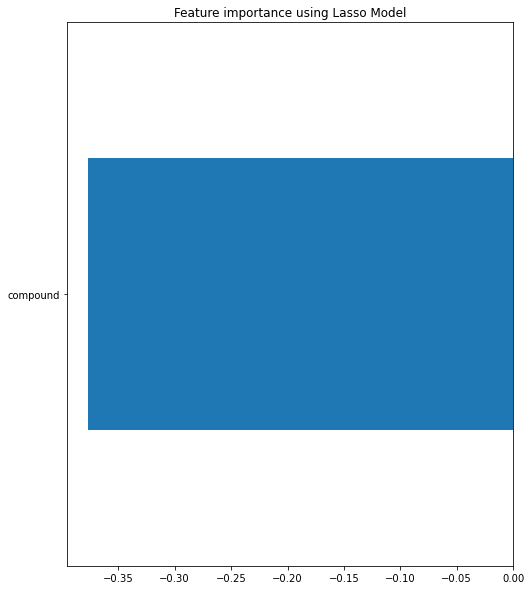

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

imp_coef_minimalism = coef_minimalism.sort_values()[coef_minimalism != 0]
plt.figure(figsize=(8,10))
imp_coef_minimalism.plot(kind = "barh")
plt.title("Feature importance using Lasso Model");

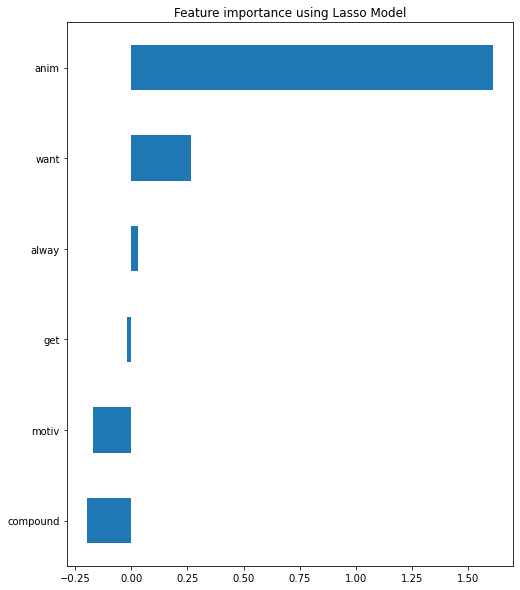

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

imp_coef_vegan = coef_vegan.sort_values()[coef_vegan != 0]
plt.figure(figsize=(8,10))
imp_coef_vegan.plot(kind = "barh")
plt.title("Feature importance using Lasso Model");

In [32]:
imp_coef_vegan

compound   -0.196187
motiv      -0.167508
get        -0.020278
alway       0.029252
want        0.268162
anim        1.608600
dtype: float64

In [33]:
X_vegan_train

,alway,anim,diet,eat,enough,feel,first,get,go,health,...,look,made,motiv,much,reason,vegan,vegetarian,want,way,compound
2,0.000000,0.000000,0.455353,0.000000,0.000000,0.000000,0.494293,0.000000,0.000000,0.494293,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.551365,0.000000,0.000000,0.000000,0.7407
19,0.000000,0.000000,0.677543,0.000000,0.000000,0.735483,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.8402
6,0.000000,0.380947,0.601029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.363878,0.000000,0.000000,0.601029,-0.7436
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.626854,0.000000,...,0.000000,0.680459,0.000000,0.000000,0.000000,0.379513,0.000000,0.000000,0.000000,0.4215
21,0.000000,0.000000,0.000000,0.000000,0.000000,0.506765,0.000000,0.000000,0.000000,0.506765,...,0.000000,0.000000,0.000000,0.000000,0.434225,0.282639,0.000000,0.000000,0.466843,0.8685
1,0.000000,0.000000,0.000000,0.000000,0.300260,0.000000,0.000000,0.553212,0.276606,0.000000,...,0.600519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.8708
16,0.000000,0.000000,0.000000,0.000000,0.759364,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650666,0.000000,-0.5457
0,0.653590,0.381627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.653590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.4404
15,0.000000,0.286001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.419703,0.546372,0.000000,0.000000,0.000000,-0.3400
23,0.000000,0.509293,0.000000,0.401762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.436118,0.000000,0.000000,0.373691,0.243237,0.436118,0.000000,0.000000,0.6486


In [34]:
vegan_features_embedded = X_vegan_train[['anim','motiv','want','compound']]
vegan_features_embedded

,anim,motiv,want,compound
2,0.000000,0.000000,0.000000,0.7407
19,0.000000,0.000000,0.000000,0.8402
6,0.380947,0.000000,0.000000,-0.7436
7,0.000000,0.000000,0.000000,0.4215
21,0.000000,0.000000,0.000000,0.8685
1,0.000000,0.000000,0.000000,-0.8708
16,0.000000,0.000000,0.650666,-0.5457
0,0.381627,0.000000,0.000000,0.4404
15,0.286001,0.000000,0.000000,-0.3400
23,0.509293,0.000000,0.000000,0.6486


In [35]:
minimalism_features_embedded = X_minimalism_train[['compound']]
minimalism_features_embedded

,compound
0,0.9705
1,0.5574
2,0.2500
3,-0.4795
4,0.0000
5,-0.7003
6,0.7263
8,-0.6597
9,-0.0900
15,-0.1655


In [36]:
imp_coef_minimalism

compound   -0.376904
dtype: float64

## Feature selection results : 

In [37]:
print("minimalism filter features: ", minimalism_features_new.columns.values)
print("minimalism wrapper_rfe features: ", minimalism_features_rfe.columns.values)
print("minimalism embedded features: " , minimalism_features_embedded.columns.values)
print("vegan filter features: ", vegan_features_new.columns.values)
print("vegan wrapper_rfe features: ", minimalism_features_rfe.columns.values)
print("vegan embedded features: ", vegan_features_embedded.columns.values)

minimalism filter features:  ['alway' 'earth' 'wast' 'compound']
minimalism wrapper_rfe features:  ['earth' 'environment' 'wast' 'compound']
minimalism embedded features:  ['compound']
vegan filter features:  ['alway' 'anim' 'get' 'health']
vegan wrapper_rfe features:  ['earth' 'environment' 'wast' 'compound']
vegan embedded features:  ['anim' 'motiv' 'want' 'compound']


## 3. Model Selection

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def draw_roc_curve(actual, predictions, pos_label):
    fpr, tpr, t = roc_curve(actual, predictions, pos_label=pos_label)
    roc_auc = auc(fpr, tpr) # calculate area under the curve (AUC)

    plt.plot(fpr, tpr, color='blue')
    plt.plot([0, 1], [0, 1], 'k:') # create the diagonal line. k is for black color and : is for a dotted line style
    plt.xlim(0, 1.01)
    plt.ylim(0, 1.01)
    plt.text(0.2, 0.7, "AUC: {:.2f}".format(roc_auc)) # print the AUC

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [39]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics 

### Model 1: Nearest neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)  # initialize the model 

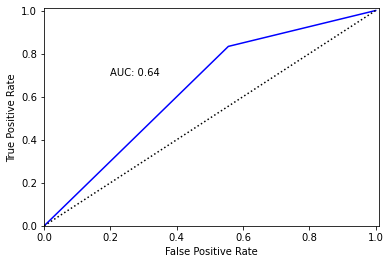

In [42]:
loo = LeaveOneOut()

X_train = np.array(minimalism_features_rfe)
Y_train = np.array(Y_minimalism_train)

predictions = [] # create an empty list to save predictions
actual = [] # create an empty list to save the actual values

# use leave one out to split the data to train and test
for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    # fit the model on the train set and predict the test observation (probability estimates)
    prediction = knn_classifier.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)

    # save prediction and actual value of the test observation    
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)
#actual
draw_roc_curve(actual, predictions, 1) # 5 (stars) is the positive label in the current dataset

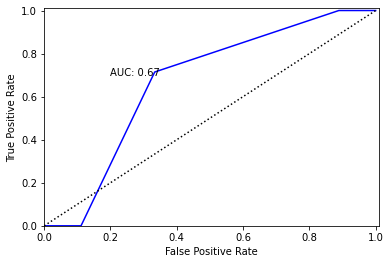

In [43]:
loo = LeaveOneOut()

X_train = np.array(vegan_features_embedded)
Y_train = np.array(Y_vegan_train)

predictions = [] # create an empty list to save predictions
actual = [] # create an empty list to save the actual values

# use leave one out to split the data to train and test
for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    # fit the model on the train set and predict the test observation (probability estimates)
    prediction = knn_classifier.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)

    # save prediction and actual value of the test observation    
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)
#actual
draw_roc_curve(actual, predictions, 1) # 5 (stars) is the positive label in the current dataset

### Model 2: Regression

In [44]:
from sklearn import linear_model

LogisticRegressor = linear_model.LogisticRegression()

LogisticRegressor.fit(minimalism_features_rfe, Y_minimalism_train)

coeff_df = pd.DataFrame(LogisticRegressor.coef_[0], minimalism_features_rfe.columns, columns=['Coefficient']) # DataFrame(data, index, columns) 
coeff_df.sort_values(by = 'Coefficient', ascending=False)

,Coefficient
environment,0.460561
earth,0.413341
wast,0.334536
compound,-1.183083


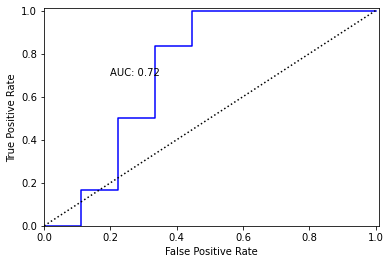

In [45]:
loo = LeaveOneOut()

X_train = np.array(minimalism_features_rfe)
Y_train = np.array(Y_minimalism_train)

predictions = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = LogisticRegressor.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1) 

In [46]:
from sklearn import linear_model

LogisticRegressor = linear_model.LogisticRegression()

LogisticRegressor.fit(vegan_features_embedded, Y_vegan_train)

coeff_df = pd.DataFrame(LogisticRegressor.coef_[0], vegan_features_embedded.columns, columns=['Coefficient']) # DataFrame(data, index, columns) 
coeff_df.sort_values(by = 'Coefficient', ascending=False)

,Coefficient
anim,1.010153
want,0.396384
motiv,-0.359269
compound,-0.617828


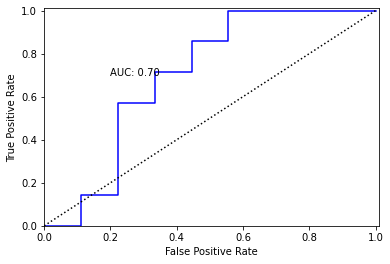

In [47]:
loo = LeaveOneOut()

X_train = np.array(vegan_features_embedded)
Y_train = np.array(Y_vegan_train)

predictions = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = LogisticRegressor.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1) 

### Model 3: Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier 

# create Decision Tree Classifer object
dt = DecisionTreeClassifier()
dt = dt.fit(minimalism_features_rfe, Y_minimalism_train) # train Decision Tree Classifer

importances = pd.DataFrame({'feature':minimalism_features_rfe.columns,'importance':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
3,compound,0.545
1,environment,0.250
0,earth,0.205
2,wast,0.000


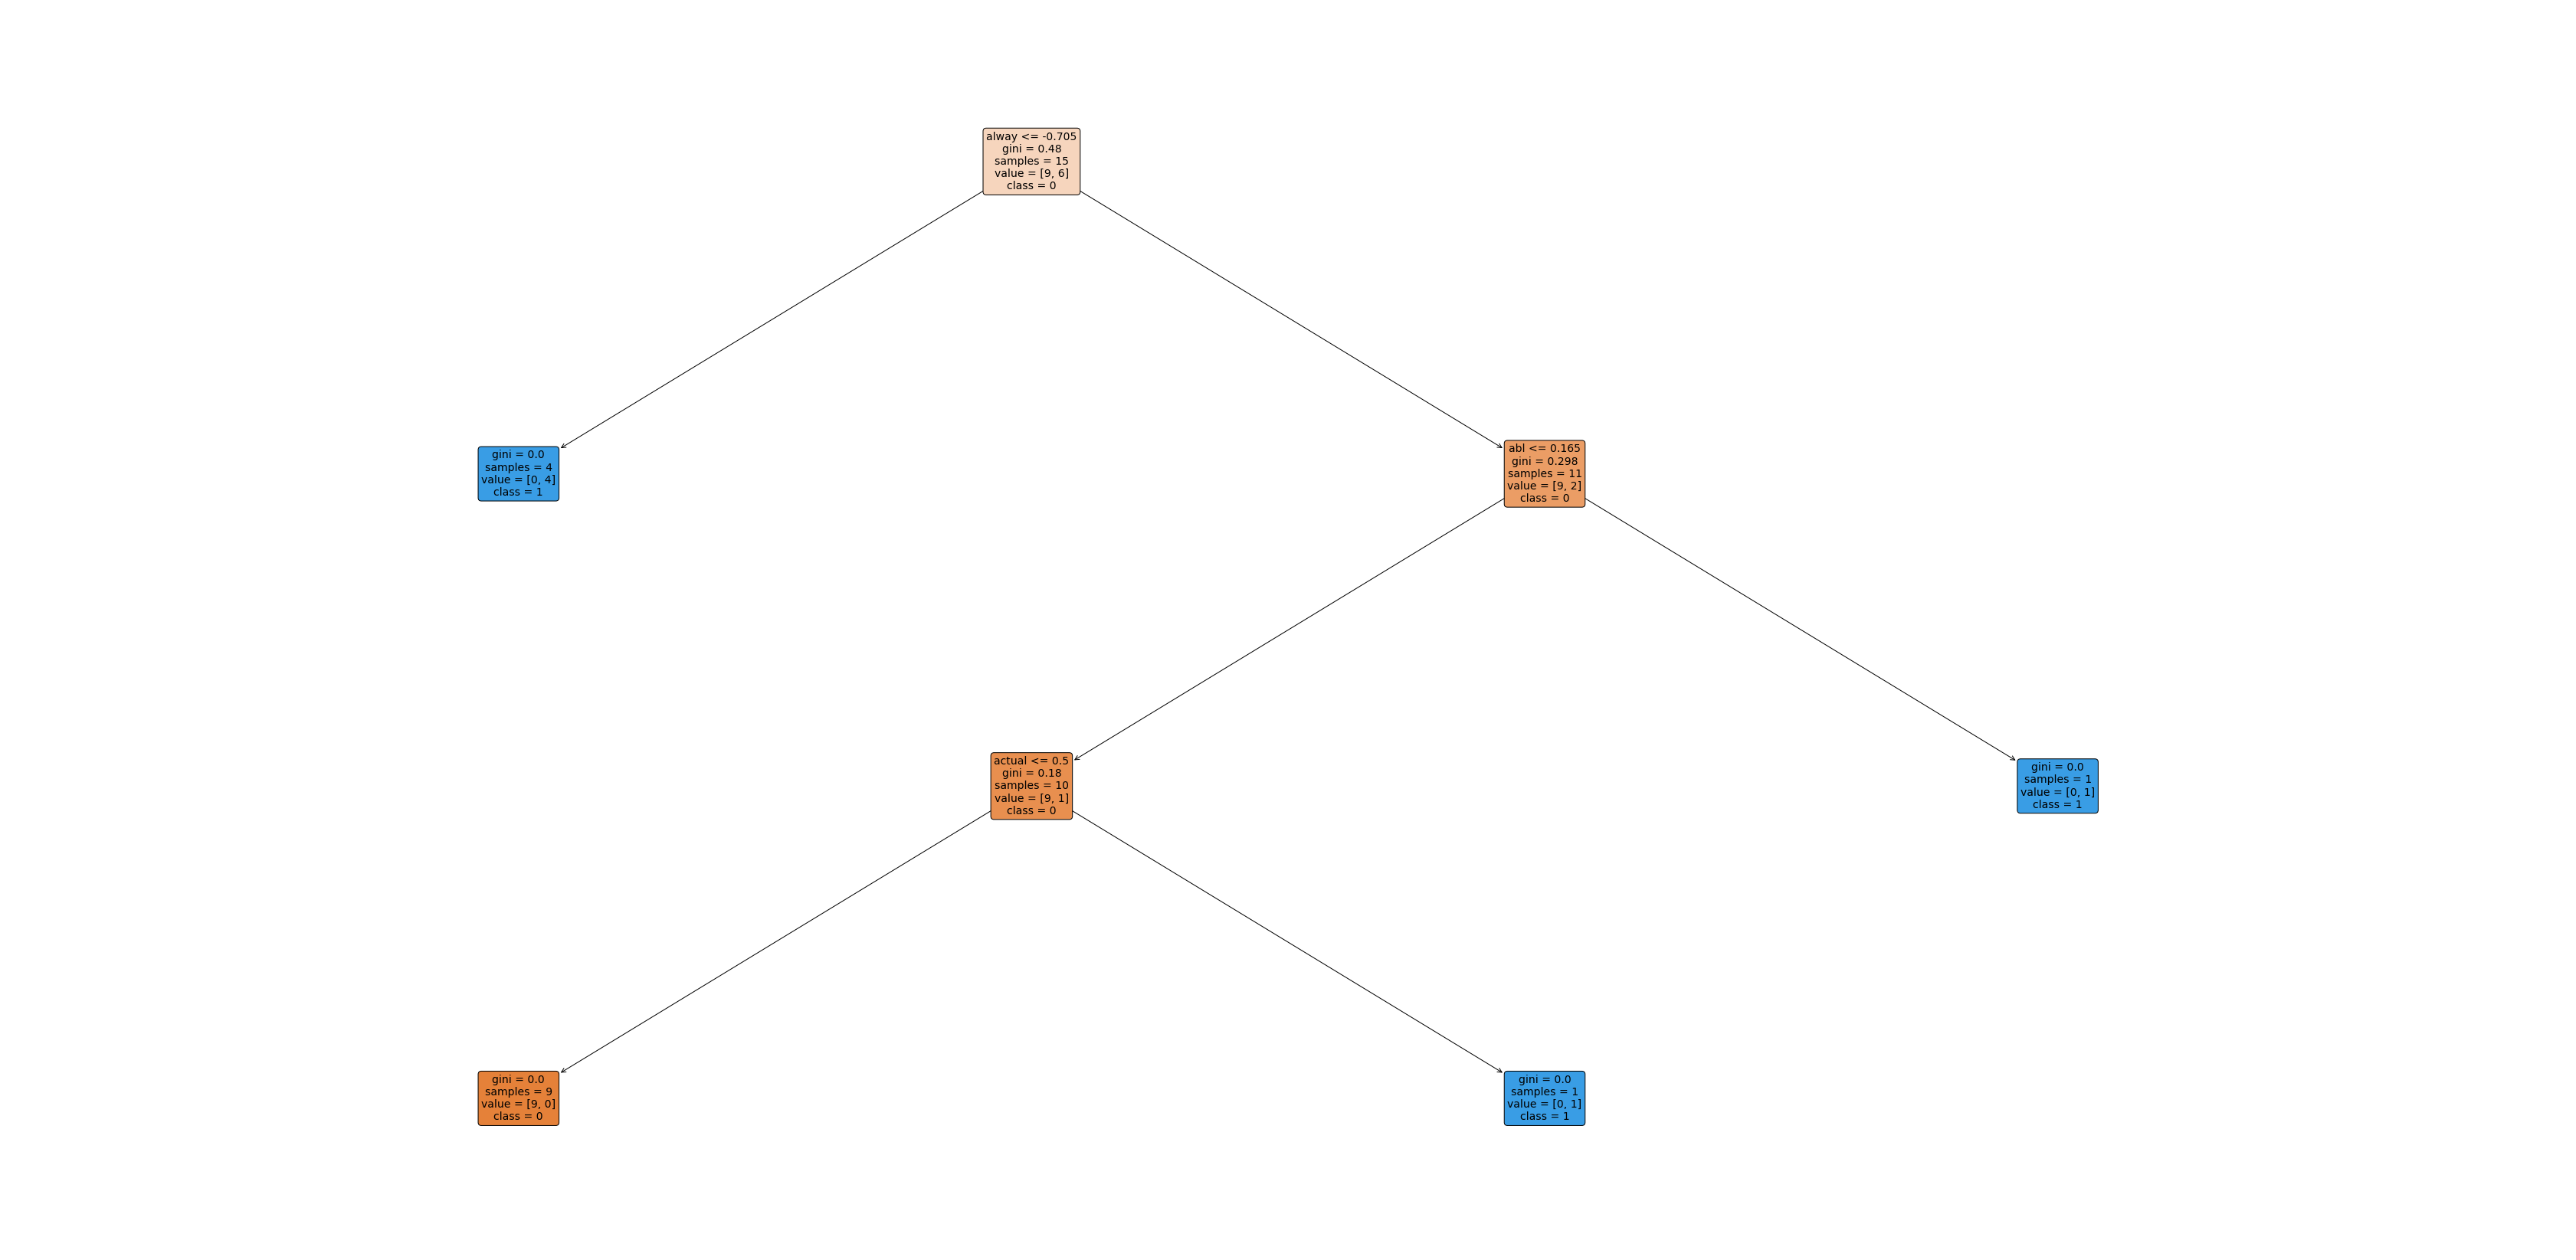

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,30)) # change to fit to your tree
tree = plot_tree(dt, 
              feature_names=X_minimalism.columns, 
              class_names=['0','1'], # names of each of the target classes in ascending numerical order. Only relevant for classification
              filled=True, # paint nodes to indicate majority class for classification or extremity of values for regression
              rounded=True, # draw node boxes with rounded corners and use Helvetica fonts
              fontsize=14)

# save the tree as a png image
#plt.savefig('tree.png')

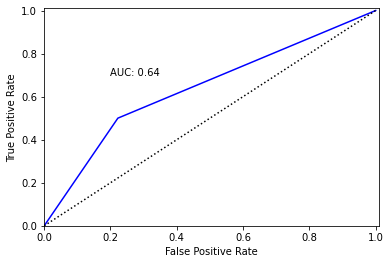

In [50]:
loo = LeaveOneOut()

X_train = np.array(minimalism_features_rfe)
Y_train = np.array(Y_minimalism_train)

dt = DecisionTreeClassifier(max_depth = 3)

predictions = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = dt.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1) 

In [51]:
from sklearn.tree import DecisionTreeClassifier 

# create Decision Tree Classifer object
dt = DecisionTreeClassifier()
dt = dt.fit(vegan_features_embedded, Y_vegan_train) # train Decision Tree Classifer

importances = pd.DataFrame({'feature':vegan_features_embedded.columns,'importance':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
0,anim,0.771
2,want,0.229
1,motiv,0.000
3,compound,0.000


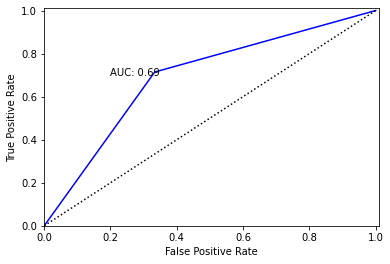

In [52]:
loo = LeaveOneOut()

X_train = np.array(vegan_features_embedded)
Y_train = np.array(Y_vegan_train)

dt = DecisionTreeClassifier(max_depth = 3)

predictions = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = dt.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1) 

### Model 4: Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# initialize a random forest classifier with 1000 decision trees
rf = RandomForestClassifier(n_estimators=50, random_state=1)

rf.fit(minimalism_features_rfe, Y_minimalism_train);

importances = pd.DataFrame({'feature':minimalism_features_rfe.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
3,compound,0.619
1,environment,0.136
0,earth,0.123
2,wast,0.121


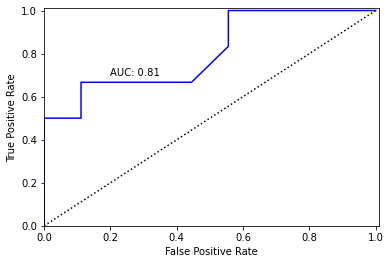

In [54]:
loo = LeaveOneOut()

X_train = np.array(minimalism_features_rfe)
Y_train = np.array(Y_minimalism_train)

predictions = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = rf.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1)

In [55]:
len(minimalism_features_rfe)


15

In [56]:
from sklearn.ensemble import RandomForestClassifier

# initialize a random forest classifier with 1000 decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=1)

rf.fit(vegan_features_embedded, Y_vegan_train);

importances = pd.DataFrame({'feature':vegan_features_embedded.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
0,anim,0.600
3,compound,0.224
2,want,0.159
1,motiv,0.017


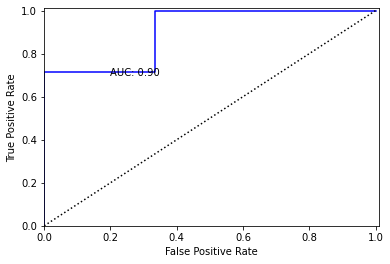

In [57]:
loo = LeaveOneOut()

X_train = np.array(vegan_features_embedded)
Y_train = np.array(Y_vegan_train)

predictions = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = rf.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1)

### The model with the best auc-roc value we got on the subset of the train set is : <br><br>for veganism:*RandomForestClassifier* with features chosen by the embedded method :<br> ['anim', 'motiv', 'want', 'compound']<br><br>for minimalism: *RandomForestClassifier* with features chosen by the wrapper method using rfe model : ['earth', 'environment', 'wast', 'compound']

## 4.Evaluating the chosen model on the test set :

In [58]:
cols_rfe_minimalism

array([ 7,  9, 36, 39], dtype=int64)

### Selecting the tuned features on the test set

In [59]:
X_minimalism_test_features_matrix = minimalism_rfe_selector.transform(X_minimalism_test) 
X_minimalism_test_selected = X_minimalism_test.iloc[:, cols_rfe_minimalism]

print(X_minimalism_test_selected.shape)
X_minimalism_test_selected.head()

(8, 4)


,earth,environment,wast,compound
7,0.315334,0.315334,0.0,0.5945
10,0.000000,0.000000,0.0,0.7096
22,0.000000,0.000000,0.0,-0.1655
11,0.000000,0.000000,0.0,0.4091
12,0.000000,0.000000,0.0,0.0772


In [60]:
vegan_features_embedded_names = vegan_features_embedded.columns.values
vegan_features_embedded_names

array(['anim', 'motiv', 'want', 'compound'], dtype=object)

In [61]:
X_vegan_test_selected = X_vegan_test[['anim', 'motiv', 'want', 'compound']]

print(X_vegan_test_selected.shape)
X_vegan_test_selected.head()

(8, 4)


,anim,motiv,want,compound
13,0.000000,0.0,0.0,0.9216
18,0.723122,0.0,0.0,0.2960
3,1.000000,0.0,0.0,-0.5423
14,0.504232,0.0,0.0,-0.8720
20,0.271620,0.0,0.0,0.3343


### Evaluation on the test set : predict_proba

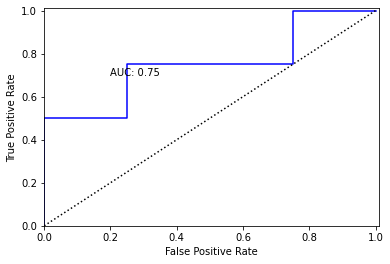

In [62]:
X_train = np.array(vegan_features_embedded)
Y_train = np.array(Y_vegan_train)

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, Y_train)
Y_pred = rf.predict_proba(X_vegan_test_selected)[:, 1]
draw_roc_curve(Y_vegan_test, Y_pred, 1)

In [63]:
X_minimalism_test_selected

,earth,environment,wast,compound
7,0.315334,0.315334,0.00000,0.5945
10,0.000000,0.000000,0.00000,0.7096
22,0.000000,0.000000,0.00000,-0.1655
11,0.000000,0.000000,0.00000,0.4091
12,0.000000,0.000000,0.00000,0.0772
13,0.000000,0.000000,0.00000,0.5849
14,0.000000,0.204760,0.20476,-0.8760
20,0.000000,0.000000,0.00000,0.4215


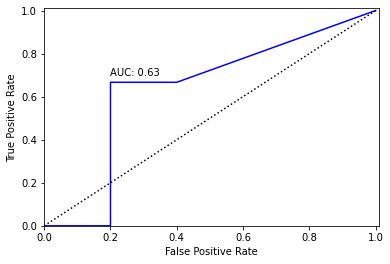

In [64]:
X_train = np.array(minimalism_features_rfe)
Y_train = np.array(Y_minimalism_train)

rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train, Y_train)
Y_pred = rf.predict_proba(X_minimalism_test_selected)[:, 1]
draw_roc_curve(Y_minimalism_test, Y_pred, 1)

### Evaluating the model on the test set : Leave One Out cross validation

In [65]:
cols_rfe_minimalism

array([ 7,  9, 36, 39], dtype=int64)

In [66]:
X_minimalism_big_train_features_matrix = minimalism_rfe_selector.transform(X_minimalism) 
X_minimalism_big_train_features_selected = X_minimalism.iloc[:, cols_rfe_minimalism]

print(X_minimalism_big_train_features_selected.shape)
X_minimalism_big_train_features_selected.head()

(23, 4)


,earth,environment,wast,compound
0,0.0,0.0,0.0,0.9705
1,0.0,0.0,0.0,0.5574
2,0.0,0.0,0.0,0.2500
3,0.0,0.0,0.0,-0.4795
4,0.0,0.0,0.0,0.0000


In [239]:
from sklearn.ensemble import RandomForestClassifier

# initialize a random forest classifier with 1000 decision trees
rf = RandomForestClassifier(n_estimators=50)

rf.fit(X_minimalism_big_train_features_selected, Y_minimalism);

importances = pd.DataFrame({'feature':X_minimalism_big_train_features_selected.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
3,compound,0.612
0,earth,0.175
1,environment,0.131
2,wast,0.082


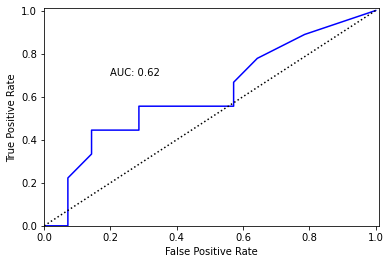

In [67]:
loo = LeaveOneOut()

X_train = np.array(X_minimalism_big_train_features_selected)
Y_train = np.array(Y_minimalism)

rf_minimalism = RandomForestClassifier(n_estimators=50, random_state=1)
#rf.fit(X_train, Y_train)
predictions = []
predictions_binary = []
actual = [] 
 
for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = rf_minimalism.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
    prediction_binary = rf_minimalism.fit(X_loo_train, Y_loo_train).predict(X_loo_test)
    predictions_binary.extend(prediction_binary)
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1)

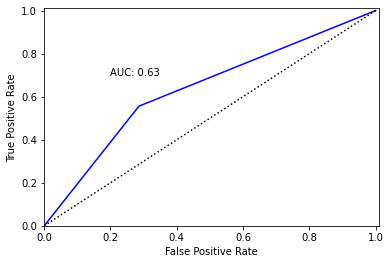

In [68]:
draw_roc_curve(actual, predictions_binary, 1)

In [69]:
predictions_binary


[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0]

In [70]:
actual

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]

In [71]:
X_vegan_big_train_features_selected = X_vegan[['anim', 'motiv', 'want', 'compound']]

print(X_vegan_big_train_features_selected.shape)
X_vegan_big_train_features_selected.head()

(24, 4)


,anim,motiv,want,compound
0,0.381627,0.00000,0.0,0.4404
1,0.000000,0.00000,0.0,-0.8708
2,0.000000,0.00000,0.0,0.7407
3,1.000000,0.00000,0.0,-0.5423
4,0.000000,0.57735,0.0,-0.5994


In [243]:
from sklearn.ensemble import RandomForestClassifier

# initialize a random forest classifier with 1000 decision trees
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_vegan_big_train_features_selected, Y_vegan);

importances = pd.DataFrame({'feature':X_vegan_big_train_features_selected.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
0,anim,0.519
3,compound,0.325
2,want,0.109
1,motiv,0.047


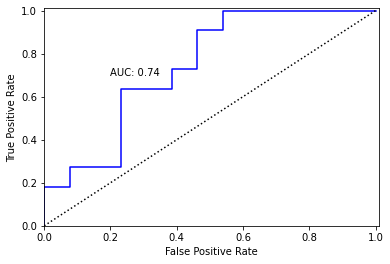

In [72]:
loo = LeaveOneOut()

X_train = np.array(X_vegan_big_train_features_selected)
Y_train = np.array(Y_vegan)


rf_vegan = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, Y_train)

predictions = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = rf_vegan.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

draw_roc_curve(actual, predictions, 1)

## showing logistic regressions coefficients for each behaviour on the big test set :

In [73]:
from sklearn import linear_model

minimalism_LogisticRegressor = linear_model.LogisticRegression()

minimalism_LogisticRegressor.fit(X_minimalism_big_train_features_selected, Y_minimalism)


minimalism_coeff_df = pd.DataFrame(minimalism_LogisticRegressor.coef_[0], X_minimalism_big_train_features_selected.columns, columns=['Coefficient']) # DataFrame(data, index, columns) 

minimalism_coeff_df.sort_values(by = 'Coefficient', ascending=False)

,Coefficient
earth,0.621821
environment,0.534881
wast,0.225823
compound,-0.694055


In [74]:
vegan_LogisticRegressor = linear_model.LogisticRegression()

vegan_LogisticRegressor.fit(X_vegan_big_train_features_selected, Y_vegan)

vegan_coeff_df = pd.DataFrame(vegan_LogisticRegressor.coef_[0], X_vegan_big_train_features_selected.columns, columns=['Coefficient']) # DataFrame(data, index, columns) 
vegan_coeff_df.sort_values(by = 'Coefficient', ascending=False)

,Coefficient
anim,1.091093
want,0.417517
motiv,-0.058316
compound,-1.090774


In [75]:
from sklearn.tree import DecisionTreeClassifier 

# create Decision Tree Classifer object
dt = DecisionTreeClassifier(max_depth = 5)
dt = dt.fit(X_minimalism_big_train_features_selected, Y_minimalism) # train Decision Tree Classifer

importances = pd.DataFrame({'feature':X_minimalism_big_train_features_selected.columns,'importance':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
3,compound,0.630
0,earth,0.233
1,environment,0.137
2,wast,0.000


In [76]:
from sklearn.tree import DecisionTreeClassifier 

# create Decision Tree Classifer object
dt = DecisionTreeClassifier(max_depth = 5)
dt = dt.fit(X_vegan_big_train_features_selected, Y_vegan) # train Decision Tree Classifer

importances = pd.DataFrame({'feature':X_vegan_big_train_features_selected.columns,'importance':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
0,anim,0.541
3,compound,0.168
1,motiv,0.154
2,want,0.137


## 5. reading unlabled data:

In [77]:
import pandas as pd

In [78]:
unlabled_minimalism = pd.read_csv('unlabled_minimalism.csv')
unlabled_minimalism = unlabled_minimalism[['Post text','Subreddit','Position']]
unlabled_minimalism.head(5)

,Post text,Subreddit,Position
0,"For me, it??s a free calendar that keeps me m...",minimalism,1
1,My bank account and investment growth. Minimal...,minimalism,2
2,"Haha, for me it's remembering coming from a ba...",minimalism,5
3,"For me, I think about all of the money I get t...",minimalism,6
4,My goals are so small that they are done befor...,minimalism,7


In [79]:
for index, row in unlabled_minimalism.iterrows():
    if row['Subreddit'] == 'Anticonsumption':
        unlabled_minimalism['Subreddit'][index] = 'minimalism'
unlabled_minimalism['Subreddit'].unique()

<ipython-input-79-6f6b8a10998c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabled_minimalism['Subreddit'][index] = 'minimalism'


array(['minimalism'], dtype=object)

In [80]:
unlabled_vegan = pd.read_csv('unlabled_vegan.csv')
unlabled_vegan = unlabled_vegan[['Post text','Subreddit','Position']]
unlabled_vegan.head(5)

,Post text,Subreddit,Position
0,Went vegan after watching a few documentaries ...,vegan,3
1,Earthling Ed and Game changers turned me vegan...,vegan,5
2,I??ve been on a plant based diet for 5 years ...,vegan,6
3,Not wanting or needing to harm and kill animal...,vegan,7
4,"I was at the lowest point in my life, I??d ha...",vegan,8


## 6. Creating features for the unlabled data based on features selected from labled data:

In [81]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 

stop_words = stopwords.words('english')
stemmer = PorterStemmer()

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TFIDF vector, remove common english words.
minimalism_voc = ['earth', 'environment', 'wast']
vegan_voc = ['anim', 'motiv', 'want']
unlabled_tfidf_vegan = TfidfVectorizer(vocabulary=vegan_voc)# min_df is how
unlabled_tfidf_minimalism = TfidfVectorizer(vocabulary=minimalism_voc)# min_df is
# min_df - igonre words that appear in less than 15% of the reviews (i.e., less than 60 reviews).

unlabled_tfidf_matrix_vegan = unlabled_tfidf_vegan.fit_transform(unlabled_vegan["Post text"].tolist())
unlabled_tfidf_matrix_minimalism = unlabled_tfidf_minimalism.fit_transform(unlabled_minimalism["Post text"].tolist())

unlabled_dense_vegan = unlabled_tfidf_matrix_vegan.todense()
unlabled_dense_minimalism = unlabled_tfidf_matrix_minimalism.todense()

print("unlabled vegan common words features",unlabled_dense_vegan.shape)
print("unlabled minimalism common words features",unlabled_dense_minimalism.shape)

unlabled vegan common words features (1244, 3)
unlabled minimalism common words features (403, 3)


In [83]:
unlabled_tfidf_features_vegan = unlabled_tfidf_vegan.get_feature_names()
unlabled_tfidf_features_minimalism = unlabled_tfidf_minimalism.get_feature_names()
print(unlabled_tfidf_features_vegan)
print("")
print(unlabled_tfidf_features_minimalism)

unlabled_vegan_features = pd.DataFrame(data=unlabled_dense_vegan, columns=unlabled_tfidf_features_vegan)
unlabled_minimalism_features = pd.DataFrame(data=unlabled_dense_minimalism, columns=unlabled_tfidf_features_minimalism)


['anim', 'motiv', 'want']

['earth', 'environment', 'wast']


### adding compound to features for each behaviour

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
unlabled_minimalism['compound'] = unlabled_minimalism['Post text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
unlabled_vegan['compound'] = unlabled_vegan['Post text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

unlabled_vegan_features['compound'] = list(unlabled_vegan['compound'])
unlabled_minimalism_features['compound'] = list(unlabled_minimalism['compound'])
print("unlabled vegan features",unlabled_vegan_features.shape)
unlabled_vegan_features.head()

unlabled vegan features (1244, 4)


,anim,motiv,want,compound
0,0.0,0.0,0.0,-0.3612
1,0.0,0.0,0.0,0.4588
2,0.0,0.0,1.0,0.7803
3,0.0,0.0,0.0,-0.7184
4,0.0,0.0,0.0,-0.5514


In [85]:
print("unlabled minimalism features",unlabled_minimalism_features.shape)
unlabled_minimalism_features.head()

unlabled minimalism features (403, 4)


,earth,environment,wast,compound
0,0.0,0.0,0.0,0.8053
1,0.0,0.0,0.0,0.6571
2,0.0,0.0,0.0,-0.8796
3,0.0,0.0,0.0,-0.3109
4,0.0,0.0,0.0,0.6705


# 7. Predicting label of unlabled data sets:

In [86]:
#rf_minimalism = RandomForestClassifier(n_estimators=50, random_state=1)
#rf_minimalism.fit(X_minimalism_big_train_features_selected,Y_minimalism)
Y_pred_minimalism = rf_minimalism.predict(unlabled_minimalism_features)
Y_pred_minimalism[0:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [87]:
#rf_vegan = RandomForestClassifier(n_estimators=100, random_state=1)
#rf_vegan.fit(X_vegan_big_train_features_selected,Y_vegan)
Y_pred_vegan = rf_vegan.predict(unlabled_vegan_features)
Y_pred_vegan[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [88]:
labled_minimalism = unlabled_minimalism
labled_minimalism['label'] = Y_pred_minimalism
labled_minimalism.head(5)

,Post text,Subreddit,Position,compound,label
0,"For me, it??s a free calendar that keeps me m...",minimalism,1,0.8053,0
1,My bank account and investment growth. Minimal...,minimalism,2,0.6571,1
2,"Haha, for me it's remembering coming from a ba...",minimalism,5,-0.8796,1
3,"For me, I think about all of the money I get t...",minimalism,6,-0.3109,0
4,My goals are so small that they are done befor...,minimalism,7,0.6705,1


In [89]:
labled_vegan = unlabled_vegan
labled_vegan['label'] = Y_pred_vegan
labled_vegan.head()

,Post text,Subreddit,Position,compound,label
0,Went vegan after watching a few documentaries ...,vegan,3,-0.3612,0
1,Earthling Ed and Game changers turned me vegan...,vegan,5,0.4588,0
2,I??ve been on a plant based diet for 5 years ...,vegan,6,0.7803,0
3,Not wanting or needing to harm and kill animal...,vegan,7,-0.7184,0
4,"I was at the lowest point in my life, I??d ha...",vegan,8,-0.5514,1


In [90]:
labled_vegan

,Post text,Subreddit,Position,compound,label
0,Went vegan after watching a few documentaries ...,vegan,3,-0.3612,0
1,Earthling Ed and Game changers turned me vegan...,vegan,5,0.4588,0
2,I??ve been on a plant based diet for 5 years ...,vegan,6,0.7803,0
3,Not wanting or needing to harm and kill animal...,vegan,7,-0.7184,0
4,"I was at the lowest point in my life, I??d ha...",vegan,8,-0.5514,1
...,...,...,...,...,...
1239,"Just switched food to vegan, I've always used ...",vegan,1402,0.4588,0
1240,I started with beauty products when I realized...,vegan,1403,-0.1790,0
1241,"Vegan should always mean the lifestyle, vegan ...",vegan,1404,-0.5267,0
1242,Veganism *is* the vegan lifestyle.,vegan,1405,0.0000,0


In [91]:
egocentric_labled_vegan = labled_vegan[labled_vegan['label']==0]
biospheric_labled_vegan = labled_vegan[labled_vegan['label']==1]
egocentric_labled_minimalism = labled_minimalism[labled_minimalism['label']==0]
biospheric_labled_minimalism = labled_minimalism[labled_minimalism['label']==1]

print("egocentric_labled_vegan : ",len(egocentric_labled_vegan))
print("biospheric_labled_vegan : ",len(biospheric_labled_vegan))
print("egocentric_labled_minimalism : ",len(egocentric_labled_minimalism))
print("biospheric_labled_minimalism : ",len(biospheric_labled_minimalism))


egocentric_labled_vegan :  1114
biospheric_labled_vegan :  130
egocentric_labled_minimalism :  348
biospheric_labled_minimalism :  55


In [92]:
biospheric_labled_vegan

,Post text,Subreddit,Position,compound,label
4,"I was at the lowest point in my life, I??d ha...",vegan,8,-0.5514,1
9,"""Aggressiive"" vegans arguing with me.\n\nBeing...",vegan,13,-0.5423,1
52,If you select anything other than the first op...,vegan,71,-0.6322,1
59,"Earthlings. \n\nAnd the memes from ""vegan side...",vegan,79,-0.5859,1
69,"animal rights, i went vegan because i didn't w...",vegan,89,-0.3570,1
...,...,...,...,...,...
1170,I don't blame people for eating meat since it'...,vegan,1323,-0.6738,1
1172,1.) Because I couldn't find a reason not to be...,vegan,1325,-0.6044,1
1180,I ran into some horrible videos one night and ...,vegan,1333,-0.5994,1
1183,I was vegetarian for almost ten years purely b...,vegan,1336,-0.6032,1


# 8. statistical analysis

In [100]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats


In [232]:
expected, observed, stats = pg.chi2_independence(data=labled_vegan, x='label',y='compound')

C:\Users\wasee\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\wasee\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\wasee\anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\wasee\anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\wasee\anaconda3\lib\site-packages\scipy\stats\stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [233]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1219.422367,765.0,2.030476e-23,0.990072,1.0
1,cressie-read,0.666667,956.258185,765.0,2.687723e-06,0.876753,1.0
2,log-likelihood,0.000000,819.817116,765.0,8.283811e-02,0.811799,1.0
3,freeman-tukey,-0.500000,NaN,765.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,765.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,765.0,NaN,NaN,NaN


In [234]:
expected, observed, stats = pg.chi2_independence(data=labled_minimalism, x='label',y='compound')
stats

C:\Users\wasee\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\wasee\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
C:\Users\wasee\anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\wasee\anaconda3\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\wasee\anaconda3\lib\site-packages\scipy\stats\stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,403.000000,321.0,0.001258,1.000000,1.0
1,cressie-read,0.666667,338.850049,321.0,0.236369,0.916962,1.0
2,log-likelihood,0.000000,321.203293,321.0,0.486305,0.892766,1.0
3,freeman-tukey,-0.500000,NaN,321.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,321.0,0.000000,inf,1.0
5,neyman,-2.000000,NaN,321.0,NaN,NaN,NaN


### creating a contingency table of(motive x behaviour)

In [213]:
df = pd.concat([labled_minimalism, labled_vegan],ignore_index = True)
df

,Post text,Subreddit,Position,compound,label
0,"For me, it??s a free calendar that keeps me m...",minimalism,1,0.8053,0
1,My bank account and investment growth. Minimal...,minimalism,2,0.6571,1
2,"Haha, for me it's remembering coming from a ba...",minimalism,5,-0.8796,1
3,"For me, I think about all of the money I get t...",minimalism,6,-0.3109,0
4,My goals are so small that they are done befor...,minimalism,7,0.6705,1
...,...,...,...,...,...
1642,"Just switched food to vegan, I've always used ...",vegan,1402,0.4588,0
1643,I started with beauty products when I realized...,vegan,1403,-0.1790,0
1644,"Vegan should always mean the lifestyle, vegan ...",vegan,1404,-0.5267,0
1645,Veganism *is* the vegan lifestyle.,vegan,1405,0.0000,0


In [214]:
df.head(405)

,Post text,Subreddit,Position,compound,label
0,"For me, it??s a free calendar that keeps me m...",minimalism,1,0.8053,0
1,My bank account and investment growth. Minimal...,minimalism,2,0.6571,1
2,"Haha, for me it's remembering coming from a ba...",minimalism,5,-0.8796,1
3,"For me, I think about all of the money I get t...",minimalism,6,-0.3109,0
4,My goals are so small that they are done befor...,minimalism,7,0.6705,1
...,...,...,...,...,...
400,The freedom to get up and move if you want/nee...,minimalism,563,0.9120,0
401,"I don't think I consciously decided to ""become...",minimalism,564,0.5267,0
402,I was struggling with depression and was strug...,minimalism,565,-0.6808,0
403,Went vegan after watching a few documentaries ...,vegan,3,-0.3612,0


In [215]:
is_minimalism = []
for index, row in df.iterrows():
    if row['Subreddit'] == 'minimalism':
        is_minimalism.append(1)
    else:
        is_minimalism.append(0)
sum(is_minimalism)

403

In [ ]:
expected, observed, stats = pg.chi2_independence(data=df, x='sex',y='alive')

In [216]:
df['is_minimalism'] = is_minimalism
df

,Post text,Subreddit,Position,compound,label,is_minimalism
0,"For me, it??s a free calendar that keeps me m...",minimalism,1,0.8053,0,1
1,My bank account and investment growth. Minimal...,minimalism,2,0.6571,1,1
2,"Haha, for me it's remembering coming from a ba...",minimalism,5,-0.8796,1,1
3,"For me, I think about all of the money I get t...",minimalism,6,-0.3109,0,1
4,My goals are so small that they are done befor...,minimalism,7,0.6705,1,1
...,...,...,...,...,...,...
1642,"Just switched food to vegan, I've always used ...",vegan,1402,0.4588,0,0
1643,I started with beauty products when I realized...,vegan,1403,-0.1790,0,0
1644,"Vegan should always mean the lifestyle, vegan ...",vegan,1404,-0.5267,0,0
1645,Veganism *is* the vegan lifestyle.,vegan,1405,0.0000,0,0


In [125]:
df.head(405)

,Post text,Subreddit,Position,compound,label,is_minimalism
0,"For me, it??s a free calendar that keeps me m...",minimalism,1,0.8053,0,1
1,My bank account and investment growth. Minimal...,minimalism,2,0.6571,1,1
2,"Haha, for me it's remembering coming from a ba...",minimalism,5,-0.8796,1,1
3,"For me, I think about all of the money I get t...",minimalism,6,-0.3109,0,1
4,My goals are so small that they are done befor...,minimalism,7,0.6705,1,1
...,...,...,...,...,...,...
400,The freedom to get up and move if you want/nee...,minimalism,563,0.9120,0,1
401,"I don't think I consciously decided to ""become...",minimalism,564,0.5267,0,1
402,I was struggling with depression and was strug...,minimalism,565,-0.6808,0,1
403,Went vegan after watching a few documentaries ...,vegan,3,-0.3612,0,0


In [137]:
#Code #1: Contingency Table showing correlation between Grades and loan status.

data_crosstab = pd.crosstab(df['Subreddit'],
                            df['label'], 
                               margins = False)
data_crosstab

label,0,1
Subreddit,,
minimalism,348,55
vegan,1114,130


In [140]:
stats.chi2_contingency(data_crosstab,correction=False)

(3.1211606028720325,
 0.07728172177693832,
 1,
 array([[ 357.7328476,   45.2671524],
        [1104.2671524,  139.7328476]]))

In [134]:
stats.chisquare(data_crosstab)

Power_divergenceResult(statistic=array([401.3378933 ,  30.40540541]), pvalue=array([2.81639330e-89, 3.50549976e-08]))

In [ ]:
stats.ttest_ind()

In [ ]:
expected, observed, stats = pg.chi2_independence(data=labled_vegan,)

In [ ]:
correlation between mturk tagging average and preict_proba 

In [179]:
data_means = pd.read_csv('batch_posts_means.csv')
data_means.head()

,Unnamed: 0,Input.Post_text,Input.Subreddit,Input_Index,comment_label,biospheric scale,egocentric scale
0,0,I like having a clean tidy house. I like havin...,minimalism,1,1,2.4,8.2
1,5,Neurological issues and facing death. The simp...,minimalism,2,1,4.0,9.6
2,10,Financial: Keeping less belongings means new a...,minimalism,3,1,2.6,8.2
3,15,Lost the person I cared about the most. Then e...,minimalism,4,1,2.4,7.2
4,20,"Clutter, wanting Financial Independence. Among...",minimalism,5,1,2.6,8.4


In [180]:
data_means.drop(columns = ['Unnamed: 0'],inplace = True)
data_means.head()

,Input.Post_text,Input.Subreddit,Input_Index,comment_label,biospheric scale,egocentric scale
0,I like having a clean tidy house. I like havin...,minimalism,1,1,2.4,8.2
1,Neurological issues and facing death. The simp...,minimalism,2,1,4.0,9.6
2,Financial: Keeping less belongings means new a...,minimalism,3,1,2.6,8.2
3,Lost the person I cared about the most. Then e...,minimalism,4,1,2.4,7.2
4,"Clutter, wanting Financial Independence. Among...",minimalism,5,1,2.6,8.4


In [181]:
egocentric_percent = []
biospheric_percent = []
for index, row in data_means.iterrows():
    egocentric_percent.append(np.around(row['egocentric scale']/10,decimals = 2))
    biospheric_percent.append(np.around(row['biospheric scale']/10,decimals = 2))
egocentric_percent

[0.82,
 0.96,
 0.82,
 0.72,
 0.84,
 0.9,
 0.78,
 0.46,
 0.78,
 0.76,
 0.94,
 0.4,
 0.86,
 0.94,
 0.92,
 0.68,
 0.54,
 0.6,
 0.38,
 0.52,
 0.38,
 0.76,
 0.62,
 0.5,
 0.52,
 0.92,
 0.96,
 0.58,
 0.44,
 0.34,
 0.38,
 0.8,
 0.46,
 0.9,
 0.36,
 0.92,
 0.42,
 0.66,
 0.3,
 0.34,
 0.42,
 0.88,
 0.88,
 0.84,
 0.76,
 0.96,
 0.94,
 0.58]

In [182]:
data_means['biospheric_percent'] = biospheric_percent
data_means['egocentric_percent'`] = egocentric_percent
data_means.head()

,Input.Post_text,Input.Subreddit,Input_Index,comment_label,biospheric scale,egocentric scale,biospheric_percent,egocentric_percent
0,I like having a clean tidy house. I like havin...,minimalism,1,1,2.4,8.2,0.24,0.82
1,Neurological issues and facing death. The simp...,minimalism,2,1,4.0,9.6,0.40,0.96
2,Financial: Keeping less belongings means new a...,minimalism,3,1,2.6,8.2,0.26,0.82
3,Lost the person I cared about the most. Then e...,minimalism,4,1,2.4,7.2,0.24,0.72
4,"Clutter, wanting Financial Independence. Among...",minimalism,5,1,2.6,8.4,0.26,0.84


In [172]:
loo = LeaveOneOut()

X_train = np.array(X_vegan_big_train_features_selected)
Y_train = np.array(Y_vegan)


rf_vegan = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, Y_train)

predictions_vegan = []
actual = [] 

for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = rf_vegan.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
  
    predictions_vegan.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

In [173]:
predictions_vegan

[0.62,
 0.74,
 0.03,
 0.72,
 0.28,
 0.13,
 0.92,
 0.04,
 0.25,
 0.44,
 1.0,
 0.04,
 0.63,
 0.0,
 0.83,
 0.53,
 0.36,
 0.57,
 0.91,
 0.0,
 0.74,
 0.0,
 0.57,
 0.62]

In [174]:
loo = LeaveOneOut()

X_train = np.array(X_minimalism_big_train_features_selected)
Y_train = np.array(Y_minimalism)

rf_minimalism = RandomForestClassifier(n_estimators=50, random_state=1)
#rf.fit(X_train, Y_train)
predictions_minimalism = []
actual = [] 
 
for train_index, test_index in loo.split(X_train, Y_train): 
    X_loo_train, X_loo_test = X_train[train_index], X_train[test_index]
    Y_loo_train, Y_loo_test = Y_train[train_index], Y_train[test_index]
    
    prediction = rf_minimalism.fit(X_loo_train, Y_loo_train).predict_proba(X_loo_test)
    
    predictions_minimalism.extend(prediction[:, 1])
    actual.extend(Y_loo_test)

In [175]:
predictions_minimalism

[0.14,
 0.06,
 0.0,
 0.28,
 0.1,
 0.78,
 0.68,
 0.54,
 0.24,
 0.7,
 0.0,
 0.0,
 0.06,
 0.2,
 0.98,
 0.72,
 0.8,
 0.1,
 0.8,
 0.12,
 0.0,
 0.78,
 0.06]

In [ ]:
data_means.drop()

In [185]:
data_means.drop(index = 8,inplace = True)
data_means

,Input.Post_text,Input.Subreddit,Input_Index,comment_label,biospheric scale,egocentric scale,biospheric_percent,egocentric_percent
0,I like having a clean tidy house. I like havin...,minimalism,1,1,2.40,8.20,0.24,0.82
1,Neurological issues and facing death. The simp...,minimalism,2,1,4.00,9.60,0.40,0.96
2,Financial: Keeping less belongings means new a...,minimalism,3,1,2.60,8.20,0.26,0.82
3,Lost the person I cared about the most. Then e...,minimalism,4,1,2.40,7.20,0.24,0.72
4,"Clutter, wanting Financial Independence. Among...",minimalism,5,1,2.60,8.40,0.26,0.84
5,"After my suicide attempt, I had the overwhelmi...",minimalism,6,1,2.40,9.00,0.24,0.90
6,It's a lot of things all rolled into one! Help...,minimalism,7,1,7.00,7.80,0.70,0.78
7,I want to live in a world where we take care o...,minimalism,8,2,9.00,4.60,0.90,0.46
9,"I'm broke. To a certain degree, you could say ...",minimalism,10,1,4.80,7.60,0.48,0.76
10,Basically because I want to live rich and not ...,minimalism,11,1,2.40,9.40,0.24,0.94


In [187]:
data_means_minimalism = data_means[data_means['Input.Subreddit'] == 'minimalism']
data_means_minimalism_ego = data_means_minimalism[data_means_minimalism['comment_label']==1]
data_means_minimalism_bio = data_means_minimalism[data_means_minimalism['comment_label']==2]

data_means_vegan = data_means[data_means['Input.Subreddit'] == 'vegan']
data_means_vegan_ego = data_means_vegan[data_means_vegan['comment_label']==1]
data_means_vegan_bio = data_means_vegan[data_means_vegan['comment_label']==2]

print(len(data_means_minimalism_bio))
print(len(data_means_minimalism_ego))
print(len(data_means_vegan_bio))
print(len(data_means_vegan_ego))

9
14
11
13


In [188]:
len(predictions_vegan)

24

In [190]:
vegan_predect_expect = data_means_vegan[['biospheric_percent','egocentric_percent']]
vegan_predect_expect['predictions_vegan'] = predictions_vegan
vegan_predect_expect.head()

<ipython-input-190-e2c60a15ce9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegan_predect_expect['predictions_vegan'] = predictions_vegan


,biospheric_percent,egocentric_percent,predictions_vegan
24,0.92,0.52,0.62
25,0.32,0.92,0.74
26,0.40,0.96,0.03
27,0.82,0.58,0.72
28,0.76,0.44,0.28


In [191]:
minimalism_predect_expect = data_means_minimalism[['biospheric_percent','egocentric_percent']]
minimalism_predect_expect['predictions_minimalism'] = predictions_minimalism
minimalism_predect_expect.head()

<ipython-input-191-146e4b25dc33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimalism_predect_expect['predictions_minimalism'] = predictions_minimalism


,biospheric_percent,egocentric_percent,predictions_minimalism
0,0.24,0.82,0.14
1,0.40,0.96,0.06
2,0.26,0.82,0.00
3,0.24,0.72,0.28
4,0.26,0.84,0.10


In [192]:
pg.pairwise_corr(data=vegan_predect_expect, columns=['biospheric_percent', 'predictions_vegan']).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,biospheric_percent,predictions_vegan,pearson,two-sided,24,0.459,"[0.07, 0.73]",0.024,2.811,0.639


In [193]:
pg.pairwise_corr(data=minimalism_predect_expect, columns=['biospheric_percent', 'predictions_minimalism']).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,biospheric_percent,predictions_minimalism,pearson,two-sided,23,0.317,"[-0.11, 0.65]",0.14,0.722,0.322


In [203]:
predictions_minimalism_reversed = predictions_minimalism
for i in range(len(predictions_minimalism)):
    res = 1-predictions_minimalism[i]
    predictions_minimalism_reversed[i] = res
predictions_minimalism_reversed

[0.86,
 0.94,
 1.0,
 0.72,
 0.9,
 0.21999999999999997,
 0.31999999999999995,
 0.45999999999999996,
 0.76,
 0.30000000000000004,
 1.0,
 1.0,
 0.94,
 0.8,
 0.020000000000000018,
 0.28,
 0.19999999999999996,
 0.9,
 0.19999999999999996,
 0.88,
 1.0,
 0.21999999999999997,
 0.94]

In [204]:
predictions_vegan_reversed = predictions_vegan
for i in range(len(predictions_vegan)):
    res = 1-predictions_vegan[i]
    predictions_vegan_reversed[i] = res
predictions_vegan_reversed

[0.38,
 0.26,
 0.97,
 0.28,
 0.72,
 0.87,
 0.07999999999999996,
 0.96,
 0.75,
 0.56,
 0.0,
 0.96,
 0.37,
 1.0,
 0.17000000000000004,
 0.47,
 0.64,
 0.43000000000000005,
 0.08999999999999997,
 1.0,
 0.26,
 1.0,
 0.43000000000000005,
 0.38]

In [223]:
minimalism_predect_expect['predictions_minimalism_reversed'] = predictions_minimalism_reversed
vegan_predect_expect['predictions_vegan_reversed'] = predictions_vegan_reversed


<ipython-input-223-4347f00b13d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimalism_predect_expect['predictions_minimalism_reversed'] = predictions_minimalism_reversed
<ipython-input-223-4347f00b13d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegan_predect_expect['predictions_vegan_reversed'] = predictions_vegan_reversed


In [230]:
vegan_predect_expect.head(10)

,biospheric_percent,egocentric_percent,predictions_vegan,predictions_vegan_reversed
24,0.92,0.52,0.62,0.38
25,0.32,0.92,0.74,0.26
26,0.40,0.96,0.03,0.97
27,0.82,0.58,0.72,0.28
28,0.76,0.44,0.28,0.72
29,0.80,0.34,0.13,0.87
30,0.98,0.38,0.92,0.08
31,0.40,0.80,0.04,0.96
32,0.40,0.46,0.25,0.75
33,0.72,0.90,0.44,0.56


In [227]:
pg.pairwise_corr(data=vegan_predect_expect, columns=['egocentric_percent', 'predictions_vegan_reversed']).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,egocentric_percent,predictions_vegan_reversed,pearson,two-sided,24,0.325,"[-0.09, 0.64]",0.122,0.785,0.349


In [229]:
pg.pairwise_corr(data=minimalism_predect_expect, columns=['egocentric_percent', 'predictions_minimalism_reversed']).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,egocentric_percent,predictions_minimalism_reversed,pearson,two-sided,23,0.089,"[-0.34, 0.48]",0.686,0.279,0.069


In [200]:
predictions_minimalism[5]

0.78

In [205]:
import seaborn as sns

Text(0.5, 0.98, 'label Distribution')

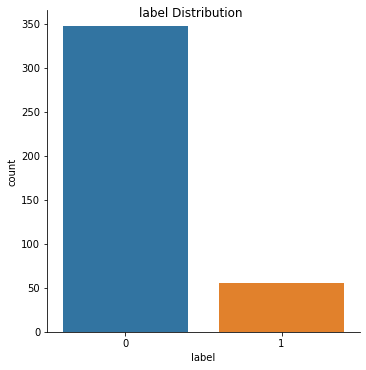

In [207]:
sns.catplot(x="label", kind="count", data=labled_minimalism);
plt.suptitle("label Distribution")

Text(0.5, 0.98, 'label Distribution')

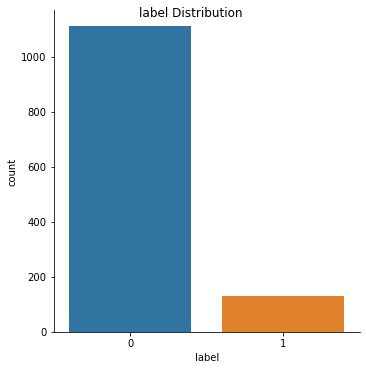

In [208]:
sns.catplot(x="label", kind="count", data=labled_vegan);
plt.suptitle("label Distribution")

In [217]:
df.head()

,Post text,Subreddit,Position,compound,label,is_minimalism
0,"For me, it??s a free calendar that keeps me m...",minimalism,1,0.8053,0,1
1,My bank account and investment growth. Minimal...,minimalism,2,0.6571,1,1
2,"Haha, for me it's remembering coming from a ba...",minimalism,5,-0.8796,1,1
3,"For me, I think about all of the money I get t...",minimalism,6,-0.3109,0,1
4,My goals are so small that they are done befor...,minimalism,7,0.6705,1,1


In [219]:

subbreddit_motive = []
sentence = ""
for index, row in df.iterrows():
    if row['label'] == 1:
        sentence = row['Subreddit']+" "'biospheric'
        subbreddit_motive.append(sentence)
    elif row['label'] == 0:
        sentence = row['Subreddit']+" "'egocentric'
        subbreddit_motive.append(sentence)
print(len(subbreddit_motive))
df['subbreddit_motive'] = subbreddit_motive
df.head()

1647


,Post text,Subreddit,Position,compound,label,is_minimalism,subbreddit_motive
0,"For me, it??s a free calendar that keeps me m...",minimalism,1,0.8053,0,1,minimalism egocentric
1,My bank account and investment growth. Minimal...,minimalism,2,0.6571,1,1,minimalism biospheric
2,"Haha, for me it's remembering coming from a ba...",minimalism,5,-0.8796,1,1,minimalism biospheric
3,"For me, I think about all of the money I get t...",minimalism,6,-0.3109,0,1,minimalism egocentric
4,My goals are so small that they are done befor...,minimalism,7,0.6705,1,1,minimalism biospheric
